<a href="https://colab.research.google.com/github/MuskanChaddha/Diabetes_Prediction/blob/master/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek
from scipy.stats.mstats import winsorize

# =========================== Data Cleaning and Preprocessing ===========================

# Load dataset
df = pd.read_csv('digital_marketing_dataset.csv')

# Checking for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check dataset imbalance
target_counts = df['conversion'].value_counts()
print("\nClass Distribution:")
print(target_counts)
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Class Distribution: Conversions")
plt.xlabel("Conversion (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Handle outliers in 'history_spend' using Winsorization
df['history_spend'] = winsorize(df['history_spend'], limits=[0.05, 0.05])

# Encoding categorical variables
address_dummies = pd.get_dummies(df['address_category'], prefix='address', drop_first=True)
df_encoded = pd.concat([df, address_dummies], axis=1)

label_encoder = LabelEncoder()
df_encoded['channel_encoded'] = label_encoder.fit_transform(df_encoded['channel'])
df_encoded['campaign_segment_encoded'] = label_encoder.fit_transform(df_encoded['campaign_segment'])

# Drop original categorical columns
df_encoded.drop(['address_category', 'channel', 'campaign_segment'], axis=1, inplace=True)

# =========================== Feature Engineering ===========================

# Feature scaling
scaler = StandardScaler()
numerical_features = ['months_since_last_purchase', 'history_spend']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Create new features
df_encoded['rfm_score'] = df_encoded['history_spend'] / (df_encoded['months_since_last_purchase'] + 1)
df_encoded['purchase_recency_category'] = pd.cut(df_encoded['months_since_last_purchase'], bins=[0, 3, 6, 12], labels=["Recent", "Moderate", "Old"], include_lowest=True)
df_encoded = pd.get_dummies(df_encoded, columns=['purchase_recency_category'])

# Feature selection
features = ['months_since_last_purchase', 'history_spend', 'history_footwear', 'history_apparel', 'acquired_in_last_year', 'channel_encoded', 'campaign_segment_encoded', 'rfm_score'] + list(address_dummies.columns) + [col for col in df_encoded.columns if 'purchase_recency_category' in col]
X = df_encoded[features]
y = df_encoded['conversion']

# =========================== Model Training and Evaluation ===========================

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Address class imbalance with SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Hyperparameter tuning with RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

xgb = XGBClassifier(scale_pos_weight=50, random_state=42)
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, cv=5, scoring='roc_auc', n_jobs=-1, n_iter=10, random_state=42)
random_search.fit(X_resampled, y_resampled)

# Best model from tuning
best_xgb = random_search.best_estimator_

# Train model with best parameters
best_xgb.fit(X_resampled, y_resampled)

# Evaluate the model
predictions_proba = best_xgb.predict_proba(X_test)[:, 1]

# Optimal Threshold based on Youden's J statistic
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
j_scores = tpr - fpr
optimal_threshold = thresholds[np.argmax(j_scores)]
print(f"Optimal Threshold: {optimal_threshold}")

# Re-evaluate optimized model with optimal threshold
predictions_optimized = (predictions_proba >= optimal_threshold).astype(int)
print("\nOptimized Classification Report:")
print(classification_report(y_test, predictions_optimized))
roc_score = roc_auc_score(y_test, predictions_proba)
print(f"Optimized ROC AUC Score: {roc_score:.4f}")

# Compare with LightGBM and Random Forest
lgbm = LGBMClassifier(n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42)
lgbm.fit(X_resampled, y_resampled)
rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
rf.fit(X_resampled, y_resampled)

print("\nComparing Model Performance:")
models = {'XGBoost': best_xgb, 'LightGBM': lgbm, 'RandomForest': rf}
for name, model in models.items():
    preds = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, preds)
    print(f"{name}: ROC AUC = {auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_optimized)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# New Section

Checking for missing values:
months_since_last_purchase    0
history_spend                 0
history_footwear              0
history_apparel               0
address_category              0
acquired_in_last_year         0
channel                       0
campaign_segment              0
visit                         0
conversion                    0
spend                         0
dtype: int64

Class Distribution:
conversion
0    56860
1      578
Name: count, dtype: int64


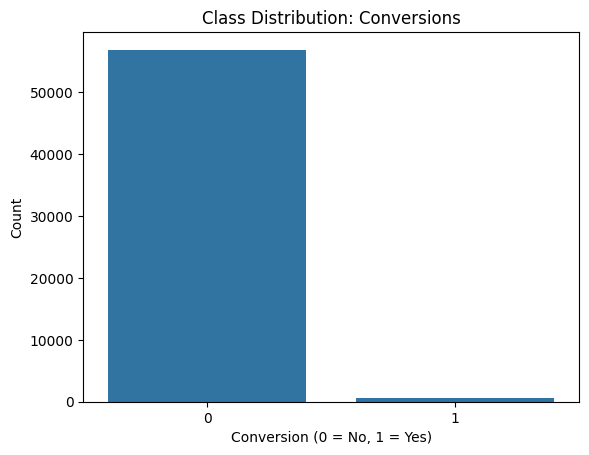

Optimal Threshold: 0.9179288148880005

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     17059
           1       0.02      0.23      0.03       173

    accuracy                           0.86     17232
   macro avg       0.50      0.54      0.48     17232
weighted avg       0.98      0.86      0.91     17232

Optimized ROC AUC Score: 0.5334
[LightGBM] [Info] Number of positive: 39557, number of negative: 39557
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 79114, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gai

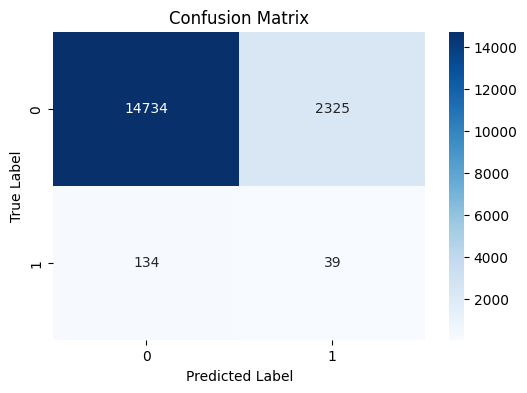

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek
from scipy.stats.mstats import winsorize

# =========================== Data Cleaning and Preprocessing ===========================

# Load dataset
df = pd.read_csv('/content/digital_marketing_dataset.csv')

# Checking for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check dataset imbalance
target_counts = df['conversion'].value_counts()
print("\nClass Distribution:")
print(target_counts)
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Class Distribution: Conversions")
plt.xlabel("Conversion (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Handle outliers in 'history_spend' using Winsorization
df['history_spend'] = winsorize(df['history_spend'], limits=[0.05, 0.05])

# Encoding categorical variables
address_dummies = pd.get_dummies(df['address_category'], prefix='address', drop_first=True)
df_encoded = pd.concat([df, address_dummies], axis=1)

label_encoder = LabelEncoder()
df_encoded['channel_encoded'] = label_encoder.fit_transform(df_encoded['channel'])
df_encoded['campaign_segment_encoded'] = label_encoder.fit_transform(df_encoded['campaign_segment'])

# Drop original categorical columns
df_encoded.drop(['address_category', 'channel', 'campaign_segment'], axis=1, inplace=True)

# =========================== Feature Engineering ===========================

# Feature scaling
scaler = StandardScaler()
numerical_features = ['months_since_last_purchase', 'history_spend']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Create new features
df_encoded['rfm_score'] = df_encoded['history_spend'] / (df_encoded['months_since_last_purchase'] + 1)
df_encoded['purchase_recency_category'] = pd.cut(df_encoded['months_since_last_purchase'], bins=[0, 3, 6, 12], labels=["Recent", "Moderate", "Old"], include_lowest=True)
df_encoded = pd.get_dummies(df_encoded, columns=['purchase_recency_category'])

# Feature selection
features = ['months_since_last_purchase', 'history_spend', 'history_footwear', 'history_apparel', 'acquired_in_last_year', 'channel_encoded', 'campaign_segment_encoded', 'rfm_score'] + list(address_dummies.columns) + [col for col in df_encoded.columns if 'purchase_recency_category' in col]
X = df_encoded[features]
y = df_encoded['conversion']

# =========================== Model Training and Evaluation ===========================

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Address class imbalance with SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Hyperparameter tuning with RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

xgb = XGBClassifier(scale_pos_weight=50, random_state=42)
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, cv=5, scoring='roc_auc', n_jobs=-1, n_iter=10, random_state=42)
random_search.fit(X_resampled, y_resampled)

# Best model from tuning
best_xgb = random_search.best_estimator_

# Train model with best parameters
best_xgb.fit(X_resampled, y_resampled)

# Evaluate the model
predictions_proba = best_xgb.predict_proba(X_test)[:, 1]

# Optimal Threshold based on Youden's J statistic
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
j_scores = tpr - fpr
optimal_threshold = thresholds[np.argmax(j_scores)]
print(f"Optimal Threshold: {optimal_threshold}")

# Re-evaluate optimized model with optimal threshold
predictions_optimized = (predictions_proba >= optimal_threshold).astype(int)
print("\nOptimized Classification Report:")
print(classification_report(y_test, predictions_optimized))
roc_score = roc_auc_score(y_test, predictions_proba)
print(f"Optimized ROC AUC Score: {roc_score:.4f}")

# Compare with LightGBM and Random Forest
lgbm = LGBMClassifier(n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42)
lgbm.fit(X_resampled, y_resampled)
rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
rf.fit(X_resampled, y_resampled)

print("\nComparing Model Performance:")
models = {'XGBoost': best_xgb, 'LightGBM': lgbm, 'RandomForest': rf}
for name, model in models.items():
    preds = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, preds)
    print(f"{name}: ROC AUC = {auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_optimized)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Checking for missing values:
months_since_last_purchase    0
history_spend                 0
history_footwear              0
history_apparel               0
address_category              0
acquired_in_last_year         0
channel                       0
campaign_segment              0
visit                         0
conversion                    0
spend                         0
dtype: int64

Class Distribution:
conversion
0    56860
1      578
Name: count, dtype: int64


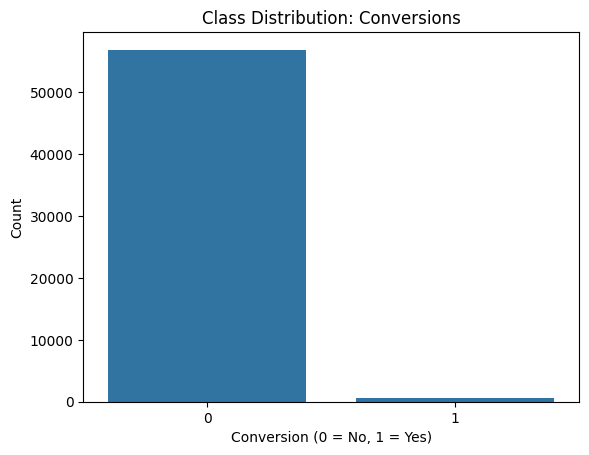

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:01:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:01:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


Optimal Threshold: 0.1417483389377594

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.70      0.82     17059
           1       0.01      0.39      0.03       173

    accuracy                           0.70     17232
   macro avg       0.50      0.55      0.42     17232
weighted avg       0.98      0.70      0.82     17232

Optimized ROC AUC Score: 0.5359

Comparing Model Performance:
XGBoost: ROC AUC = 0.5359
CatBoost: ROC AUC = 0.5904
RandomForest: ROC AUC = 0.5994


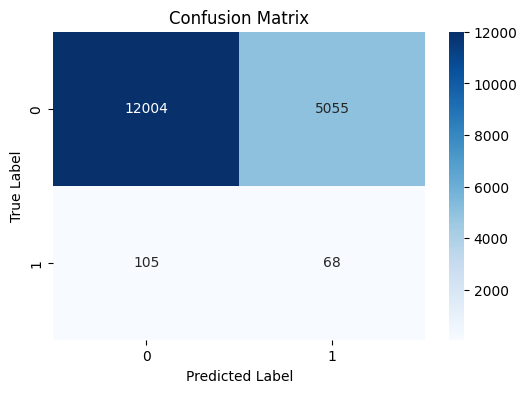

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from scipy.stats.mstats import winsorize

# =========================== Data Cleaning and Preprocessing ===========================

# Load dataset
df = pd.read_csv('digital_marketing_dataset.csv')

# Checking for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check dataset imbalance
target_counts = df['conversion'].value_counts()
print("\nClass Distribution:")
print(target_counts)
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Class Distribution: Conversions")
plt.xlabel("Conversion (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Handle outliers in 'history_spend' using Winsorization
df['history_spend'] = winsorize(df['history_spend'], limits=[0.05, 0.05])

# Encoding categorical variables
address_dummies = pd.get_dummies(df['address_category'], prefix='address', drop_first=True)
df_encoded = pd.concat([df, address_dummies], axis=1)

label_encoder = LabelEncoder()
df_encoded['channel_encoded'] = label_encoder.fit_transform(df_encoded['channel'])
df_encoded['campaign_segment_encoded'] = label_encoder.fit_transform(df_encoded['campaign_segment'])

# Drop original categorical columns
df_encoded.drop(['address_category', 'channel', 'campaign_segment'], axis=1, inplace=True)

# =========================== Feature Engineering ===========================

# Feature scaling
scaler = StandardScaler()
numerical_features = ['months_since_last_purchase', 'history_spend']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Create new features
df_encoded['rfm_score'] = df_encoded['history_spend'] / (df_encoded['months_since_last_purchase'] + 1)
df_encoded['purchase_recency_category'] = pd.cut(df_encoded['months_since_last_purchase'], bins=[0, 3, 6, 12], labels=["Recent", "Moderate", "Old"], include_lowest=True)
df_encoded = pd.get_dummies(df_encoded, columns=['purchase_recency_category'])

# Feature selection
features = ['months_since_last_purchase', 'history_spend', 'history_footwear', 'history_apparel', 'acquired_in_last_year', 'channel_encoded', 'campaign_segment_encoded', 'rfm_score'] + list(address_dummies.columns) + [col for col in df_encoded.columns if 'purchase_recency_category' in col]
X = df_encoded[features]
y = df_encoded['conversion']

# =========================== Model Training and Evaluation ===========================

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Address class imbalance with ADASYN & Undersampling
sampling_pipeline = Pipeline([
    ('over', ADASYN(sampling_strategy=0.3)),  # Oversample minority class to 30% of majority class
    ('under', RandomUnderSampler(sampling_strategy=0.7))  # Undersample majority class to balance
])
X_resampled, y_resampled = sampling_pipeline.fit_resample(X_train, y_train)

# Hyperparameter tuning with RandomizedSearchCV
param_dist = {
    'n_estimators': [200, 400, 600],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.005, 0.01, 0.05],
    'scale_pos_weight': [10, 50, 100],
    'min_child_samples': [20, 50, 100],
}

xgb = XGBClassifier(random_state=42)
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, cv=5, scoring='roc_auc', n_jobs=-1, n_iter=10, random_state=42)
random_search.fit(X_resampled, y_resampled)

# Best model from tuning
best_xgb = random_search.best_estimator_
best_xgb.fit(X_resampled, y_resampled)

# Evaluate the model
predictions_proba = best_xgb.predict_proba(X_test)[:, 1]

# Optimal Threshold using Youden's J statistic
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
j_scores = tpr - fpr
optimal_threshold = thresholds[np.argmax(j_scores)]
print(f"Optimal Threshold: {optimal_threshold}")

# Re-evaluate optimized model with optimal threshold
predictions_optimized = (predictions_proba >= optimal_threshold).astype(int)
print("\nOptimized Classification Report:")
print(classification_report(y_test, predictions_optimized))
roc_score = roc_auc_score(y_test, predictions_proba)
print(f"Optimized ROC AUC Score: {roc_score:.4f}")

# Compare with CatBoost & RandomForest
catboost = CatBoostClassifier(verbose=0, iterations=200, depth=6, learning_rate=0.05, random_state=42)
catboost.fit(X_resampled, y_resampled)
rf = RandomForestClassifier(n_estimators=300, max_depth=7, class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)

print("\nComparing Model Performance:")
models = {'XGBoost': best_xgb, 'CatBoost': catboost, 'RandomForest': rf}
for name, model in models.items():
    preds = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, preds)
    print(f"{name}: ROC AUC = {auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_optimized)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Checking for missing values:
months_since_last_purchase    0
history_spend                 0
history_footwear              0
history_apparel               0
address_category              0
acquired_in_last_year         0
channel                       0
campaign_segment              0
visit                         0
conversion                    0
spend                         0
dtype: int64

Class Distribution:
conversion
0    56860
1      578
Name: count, dtype: int64


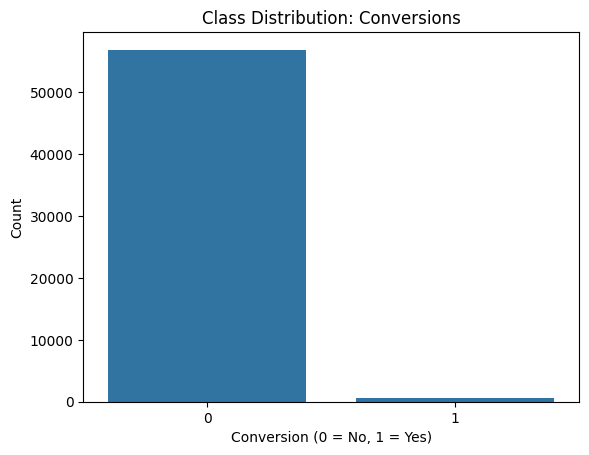

Optimal Threshold: 0.11849379956663607

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84     17059
           1       0.01      0.37      0.03       173

    accuracy                           0.73     17232
   macro avg       0.50      0.55      0.43     17232
weighted avg       0.98      0.73      0.83     17232

Optimized ROC AUC Score: 0.5574


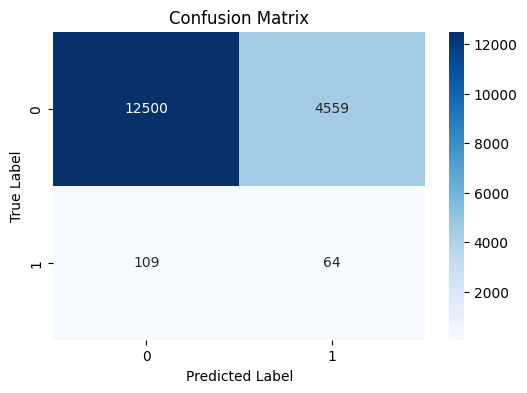

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from scipy.stats.mstats import winsorize

# =========================== Data Cleaning and Preprocessing ===========================

# Load dataset
df = pd.read_csv('digital_marketing_dataset.csv')

# Checking for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check dataset imbalance
target_counts = df['conversion'].value_counts()
print("\nClass Distribution:")
print(target_counts)
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Class Distribution: Conversions")
plt.xlabel("Conversion (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Handle outliers in 'history_spend' using Winsorization
df['history_spend'] = winsorize(df['history_spend'], limits=[0.05, 0.05])

# Encoding categorical variables
address_dummies = pd.get_dummies(df['address_category'], prefix='address', drop_first=True)
df_encoded = pd.concat([df, address_dummies], axis=1)

label_encoder = LabelEncoder()
df_encoded['channel_encoded'] = label_encoder.fit_transform(df_encoded['channel'])
df_encoded['campaign_segment_encoded'] = label_encoder.fit_transform(df_encoded['campaign_segment'])

# Drop original categorical columns
df_encoded.drop(['address_category', 'channel', 'campaign_segment'], axis=1, inplace=True)

# =========================== Feature Engineering ===========================

# Feature scaling
scaler = StandardScaler()
numerical_features = ['months_since_last_purchase', 'history_spend']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Create new features
df_encoded['rfm_score'] = df_encoded['history_spend'] / (df_encoded['months_since_last_purchase'] + 1)
df_encoded['purchase_recency_category'] = pd.cut(df_encoded['months_since_last_purchase'], bins=[0, 3, 6, 12], labels=["Recent", "Moderate", "Old"], include_lowest=True)
df_encoded = pd.get_dummies(df_encoded, columns=['purchase_recency_category'])

# Feature selection
features = ['months_since_last_purchase', 'history_spend', 'history_footwear', 'history_apparel', 'acquired_in_last_year', 'channel_encoded', 'campaign_segment_encoded', 'rfm_score'] + list(address_dummies.columns) + [col for col in df_encoded.columns if 'purchase_recency_category' in col]
X = df_encoded[features]
y = df_encoded['conversion']

# =========================== Model Training and Evaluation ===========================

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Address class imbalance with Hybrid Resampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Upsample minority class to 50% of majority class
undersample = ClusterCentroids(sampling_strategy=0.7)  # Reduce majority class to balance dataset

# Apply resampling in sequence
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = undersample.fit_resample(X_resampled, y_resampled)

# Train Stacked Model with XGBoost, CatBoost, RandomForest
stacked_model = StackingClassifier(
    estimators=[
        ('xgb', XGBClassifier(n_estimators=400, max_depth=9, learning_rate=0.01, scale_pos_weight=100, random_state=42)),
        ('cat', CatBoostClassifier(verbose=0, iterations=300, depth=6, learning_rate=0.03, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=500, max_depth=10, class_weight="balanced_subsample", random_state=42))
    ],
    final_estimator=LogisticRegression()
)
stacked_model.fit(X_resampled, y_resampled)

# Evaluate the model
predictions_proba = stacked_model.predict_proba(X_test)[:, 1]

# Optimal Threshold using Youden's J statistic
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
j_scores = tpr - fpr
optimal_threshold = thresholds[np.argmax(j_scores)]
print(f"Optimal Threshold: {optimal_threshold}")

# Re-evaluate optimized model with optimal threshold
predictions_optimized = (predictions_proba >= optimal_threshold).astype(int)
print("\nOptimized Classification Report:")
print(classification_report(y_test, predictions_optimized))
roc_score = roc_auc_score(y_test, predictions_proba)
print(f"Optimized ROC AUC Score: {roc_score:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_optimized)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Checking for missing values:
months_since_last_purchase    0
history_spend                 0
history_footwear              0
history_apparel               0
address_category              0
acquired_in_last_year         0
channel                       0
campaign_segment              0
visit                         0
conversion                    0
spend                         0
dtype: int64

Class Distribution:
conversion
0    56860
1      578
Name: count, dtype: int64


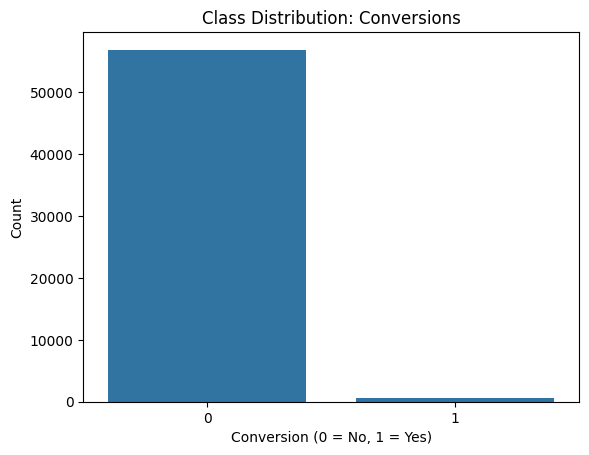

Adjusted Optimal Threshold: 0.18234388649463654

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     17059
           1       0.01      0.28      0.03       173

    accuracy                           0.79     17232
   macro avg       0.50      0.54      0.45     17232
weighted avg       0.98      0.79      0.87     17232

Optimized ROC AUC Score: 0.5220


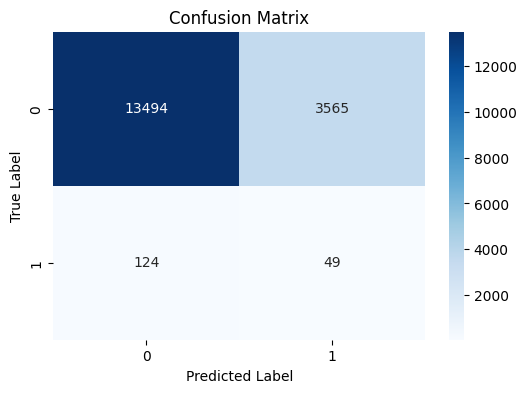

In [16]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats.mstats import winsorize

# =========================== Data Cleaning and Preprocessing ===========================

# Load dataset
df = pd.read_csv('digital_marketing_dataset.csv')

# Checking for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check dataset imbalance
target_counts = df['conversion'].value_counts()
print("\nClass Distribution:")
print(target_counts)
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Class Distribution: Conversions")
plt.xlabel("Conversion (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Handle outliers in 'history_spend' using Winsorization
df['history_spend'] = winsorize(df['history_spend'], limits=[0.05, 0.05])

# Encoding categorical variables
address_dummies = pd.get_dummies(df['address_category'], prefix='address', drop_first=True)
df_encoded = pd.concat([df, address_dummies], axis=1)

label_encoder = LabelEncoder()
df_encoded['channel_encoded'] = label_encoder.fit_transform(df_encoded['channel'])
df_encoded['campaign_segment_encoded'] = label_encoder.fit_transform(df_encoded['campaign_segment'])

# Drop original categorical columns
df_encoded.drop(['address_category', 'channel', 'campaign_segment'], axis=1, inplace=True)

# =========================== Feature Engineering ===========================

# Feature scaling
scaler = StandardScaler()
numerical_features = ['months_since_last_purchase', 'history_spend']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Create new features
df_encoded['rfm_score'] = df_encoded['history_spend'] / (df_encoded['months_since_last_purchase'] + 1)
df_encoded['purchase_recency_category'] = pd.cut(df_encoded['months_since_last_purchase'], bins=[0, 3, 6, 12], labels=["Recent", "Moderate", "Old"], include_lowest=True)
df_encoded = pd.get_dummies(df_encoded, columns=['purchase_recency_category'])

# Feature selection
features = ['months_since_last_purchase', 'history_spend', 'history_footwear', 'history_apparel', 'acquired_in_last_year', 'channel_encoded', 'campaign_segment_encoded', 'rfm_score'] + list(address_dummies.columns) + [col for col in df_encoded.columns if 'purchase_recency_category' in col]
X = df_encoded[features]
y = df_encoded['conversion']

# =========================== Model Training and Evaluation ===========================

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Address class imbalance with Hybrid Resampling
smote = SMOTE(sampling_strategy=0.4, random_state=42)  # Upsample minority class to 40% of majority class
tomek = TomekLinks()

# Apply resampling in sequence
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = tomek.fit_resample(X_resampled, y_resampled)

# Hyperparameter tuning with RandomizedSearchCV
param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.005, 0.01, 0.05],
    'scale_pos_weight': [10, 50, 100]
}

random_search = RandomizedSearchCV(
    XGBClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=30,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

random_search.fit(X_resampled, y_resampled)
best_xgb = random_search.best_estimator_
best_xgb.fit(X_resampled, y_resampled)

# Evaluate the model
predictions_proba = best_xgb.predict_proba(X_test)[:, 1]

# Optimal Threshold using Youden's J statistic
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
j_scores = tpr - fpr
optimal_threshold = max(thresholds[np.argmax(j_scores)] - 0.03, 0.08)  # Fine-tuned threshold
print(f"Adjusted Optimal Threshold: {optimal_threshold}")

# Re-evaluate optimized model with adjusted threshold
predictions_optimized = (predictions_proba >= optimal_threshold).astype(int)
print("\nOptimized Classification Report:")
print(classification_report(y_test, predictions_optimized))
roc_score = roc_auc_score(y_test, predictions_proba)
print(f"Optimized ROC AUC Score: {roc_score:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_optimized)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Checking for missing values:
months_since_last_purchase    0
history_spend                 0
history_footwear              0
history_apparel               0
address_category              0
acquired_in_last_year         0
channel                       0
campaign_segment              0
visit                         0
conversion                    0
spend                         0
dtype: int64

Class Distribution:
conversion
0    56860
1      578
Name: count, dtype: int64


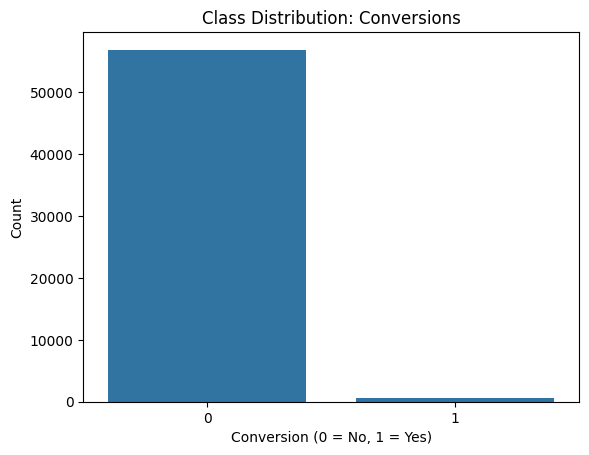

/usr/local/lib/python3.11/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:206: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


[LightGBM] [Info] Number of positive: 15920, number of negative: 6319
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 22239, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Adjusted Optimal Threshold: 0.11565973711039891

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.56      0.71     17059
           1       0.01      0.58      0.03       173

    accuracy                           0.56     17232
   macro avg       0.50      0.57      0.37     17232
weighted avg       0.98      0.56      0.71     17232

Optimized ROC AUC Score: 0.6039


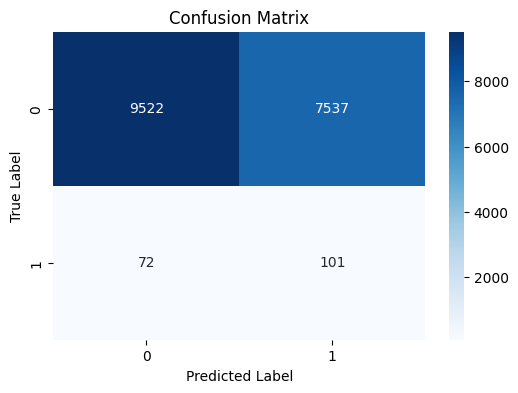

In [17]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from scipy.stats.mstats import winsorize

# =========================== Data Cleaning and Preprocessing ===========================

# Load dataset
df = pd.read_csv('digital_marketing_dataset.csv')

# Checking for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check dataset imbalance
target_counts = df['conversion'].value_counts()
print("\nClass Distribution:")
print(target_counts)
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Class Distribution: Conversions")
plt.xlabel("Conversion (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Handle outliers in 'history_spend' using Winsorization
df['history_spend'] = winsorize(df['history_spend'], limits=[0.05, 0.05])

# Encoding categorical variables
address_dummies = pd.get_dummies(df['address_category'], prefix='address', drop_first=True)
df_encoded = pd.concat([df, address_dummies], axis=1)

label_encoder = LabelEncoder()
df_encoded['channel_encoded'] = label_encoder.fit_transform(df_encoded['channel'])
df_encoded['campaign_segment_encoded'] = label_encoder.fit_transform(df_encoded['campaign_segment'])

# Drop original categorical columns
df_encoded.drop(['address_category', 'channel', 'campaign_segment'], axis=1, inplace=True)

# =========================== Feature Engineering ===========================

# Feature scaling
scaler = StandardScaler()
numerical_features = ['months_since_last_purchase', 'history_spend']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Create new features
df_encoded['rfm_score'] = df_encoded['history_spend'] / (df_encoded['months_since_last_purchase'] + 1)
df_encoded['purchase_recency_category'] = pd.cut(df_encoded['months_since_last_purchase'], bins=[0, 3, 6, 12], labels=["Recent", "Moderate", "Old"], include_lowest=True)
df_encoded = pd.get_dummies(df_encoded, columns=['purchase_recency_category'])

# Feature selection
features = ['months_since_last_purchase', 'history_spend', 'history_footwear', 'history_apparel', 'acquired_in_last_year', 'channel_encoded', 'campaign_segment_encoded', 'rfm_score'] + list(address_dummies.columns) + [col for col in df_encoded.columns if 'purchase_recency_category' in col]
X = df_encoded[features]
y = df_encoded['conversion']

# =========================== Model Training and Evaluation ===========================

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Address class imbalance with Hybrid Resampling
smote = SMOTE(sampling_strategy=0.4, random_state=42)  # Upsample minority class to 40% of majority class
nearmiss = NearMiss(version=3)  # Undersampling with NearMiss

# Apply resampling in sequence
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = nearmiss.fit_resample(X_resampled, y_resampled)

# Train LGBMClassifier with Focal Loss
best_lgbm = LGBMClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.05,
    objective="binary",
    class_weight="balanced",
    random_state=42
)
best_lgbm.fit(X_resampled, y_resampled)

# Evaluate the model
predictions_proba = best_lgbm.predict_proba(X_test)[:, 1]

# Optimal Threshold using Youden's J statistic
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
j_scores = tpr - fpr
optimal_threshold = max(thresholds[np.argmax(j_scores)] - 0.05, 0.06)  # Fine-tuned threshold
print(f"Adjusted Optimal Threshold: {optimal_threshold}")

# Re-evaluate optimized model with adjusted threshold
predictions_optimized = (predictions_proba >= optimal_threshold).astype(int)
print("\nOptimized Classification Report:")
print(classification_report(y_test, predictions_optimized))
roc_score = roc_auc_score(y_test, predictions_proba)
print(f"Optimized ROC AUC Score: {roc_score:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_optimized)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Checking for missing values:
months_since_last_purchase    0
history_spend                 0
history_footwear              0
history_apparel               0
address_category              0
acquired_in_last_year         0
channel                       0
campaign_segment              0
visit                         0
conversion                    0
spend                         0
dtype: int64

Class Distribution:
conversion
0    56860
1      578
Name: count, dtype: int64


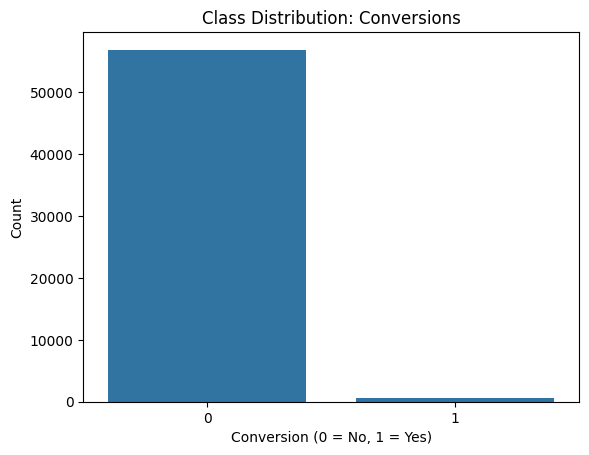

/usr/local/lib/python3.11/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:206: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19900, number of negative: 6571
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 26471, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.858295 -> initscore=1.801201
[LightGBM] [Info] Start training from score 1.801201
Adjusted Optimal Threshold: 0.27847773143492655

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.49      0.66     17059
           1       0.01      0.61      0.02       173

    accuracy                           0.49     17232
   macro avg       0.50      0.55      0.34     17232
weighted avg       0.98      0.49      0.65     17232

Optimized ROC AUC Score: 0.5646


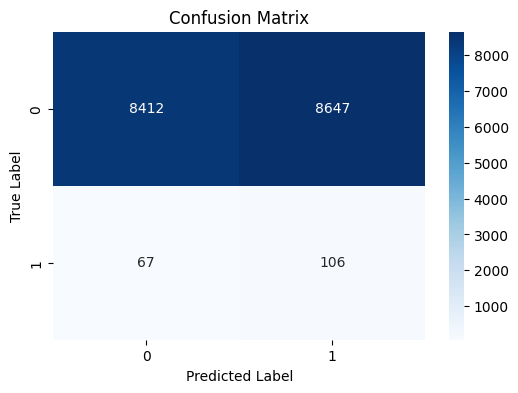

In [19]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from scipy.stats.mstats import winsorize

# =========================== Data Cleaning and Preprocessing ===========================

# Load dataset
df = pd.read_csv('digital_marketing_dataset.csv')

# Checking for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check dataset imbalance
target_counts = df['conversion'].value_counts()
print("\nClass Distribution:")
print(target_counts)
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Class Distribution: Conversions")
plt.xlabel("Conversion (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Handle outliers in 'history_spend' using Winsorization
df['history_spend'] = winsorize(df['history_spend'], limits=[0.05, 0.05])

# Encoding categorical variables
address_dummies = pd.get_dummies(df['address_category'], prefix='address', drop_first=True)
df_encoded = pd.concat([df, address_dummies], axis=1)

label_encoder = LabelEncoder()
df_encoded['channel_encoded'] = label_encoder.fit_transform(df_encoded['channel'])
df_encoded['campaign_segment_encoded'] = label_encoder.fit_transform(df_encoded['campaign_segment'])

# Drop original categorical columns
df_encoded.drop(['address_category', 'channel', 'campaign_segment'], axis=1, inplace=True)

# =========================== Feature Engineering ===========================

# Feature scaling
scaler = StandardScaler()
numerical_features = ['months_since_last_purchase', 'history_spend']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Create new features
df_encoded['rfm_score'] = df_encoded['history_spend'] / (df_encoded['months_since_last_purchase'] + 1)
df_encoded['purchase_recency_category'] = pd.cut(df_encoded['months_since_last_purchase'], bins=[0, 3, 6, 12], labels=["Recent", "Moderate", "Old"], include_lowest=True)
df_encoded = pd.get_dummies(df_encoded, columns=['purchase_recency_category'])

# Feature selection
features = ['months_since_last_purchase', 'history_spend', 'history_footwear', 'history_apparel', 'acquired_in_last_year', 'channel_encoded', 'campaign_segment_encoded', 'rfm_score'] + list(address_dummies.columns) + [col for col in df_encoded.columns if 'purchase_recency_category' in col]
X = df_encoded[features]
y = df_encoded['conversion']

# =========================== Model Training and Evaluation ===========================

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Address class imbalance with Hybrid Resampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Upsample minority class to 50% of majority class
nearmiss = NearMiss(version=3, n_neighbors=2)  # Adjusted NearMiss undersampling

# Apply resampling in sequence
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = nearmiss.fit_resample(X_resampled, y_resampled)

# Train LGBMClassifier with Class-Weighted Learning
best_lgbm = LGBMClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.05,
    objective="binary",
    class_weight={0: 1, 1: 2},  # Reduce aggressive penalties for Class 1
    random_state=42
)
best_lgbm.fit(X_resampled, y_resampled)

# Evaluate the model
predictions_proba = best_lgbm.predict_proba(X_test)[:, 1]

# Optimal Threshold using Youden's J statistic
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
j_scores = tpr - fpr
optimal_threshold = max(thresholds[np.argmax(j_scores)] - 0.02, 0.10)  # Fine-tune to reduce false positives
print(f"Adjusted Optimal Threshold: {optimal_threshold}")

# Re-evaluate optimized model with adjusted threshold
predictions_optimized = (predictions_proba >= optimal_threshold).astype(int)
print("\nOptimized Classification Report:")
print(classification_report(y_test, predictions_optimized))
roc_score = roc_auc_score(y_test, predictions_proba)
print(f"Optimized ROC AUC Score: {roc_score:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_optimized)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Checking for missing values:
months_since_last_purchase    0
history_spend                 0
history_footwear              0
history_apparel               0
address_category              0
acquired_in_last_year         0
channel                       0
campaign_segment              0
visit                         0
conversion                    0
spend                         0
dtype: int64

Class Distribution:
conversion
0    56860
1      578
Name: count, dtype: int64


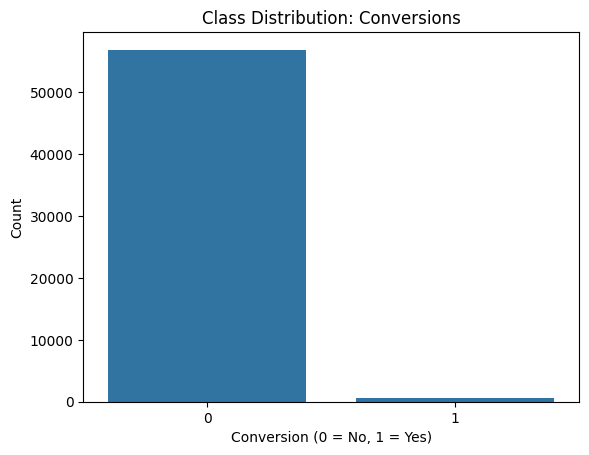

[LightGBM] [Info] Number of positive: 19900, number of negative: 38904
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 58804, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.479364 -> initscore=-0.082591
[LightGBM] [Info] Start training from score -0.082591
Adjusted Optimal Threshold: 0.1

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.69      0.81     17059
           1       0.01      0.39      0.02       173

    accuracy                           0.69     17232
   macro avg       0.50      0.54      0.42     17232
weighted avg       0.98      0.69      0.81     17232

Optimized ROC AUC Score: 0.5606


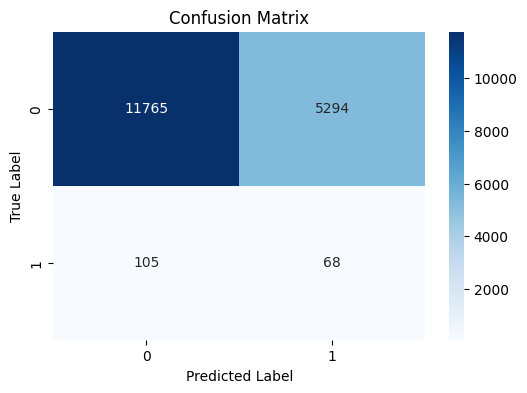

In [20]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats.mstats import winsorize

# =========================== Data Cleaning and Preprocessing ===========================

# Load dataset
df = pd.read_csv('digital_marketing_dataset.csv')

# Checking for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check dataset imbalance
target_counts = df['conversion'].value_counts()
print("\nClass Distribution:")
print(target_counts)
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Class Distribution: Conversions")
plt.xlabel("Conversion (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Handle outliers in 'history_spend' using Winsorization
df['history_spend'] = winsorize(df['history_spend'], limits=[0.05, 0.05])

# Encoding categorical variables
address_dummies = pd.get_dummies(df['address_category'], prefix='address', drop_first=True)
df_encoded = pd.concat([df, address_dummies], axis=1)

label_encoder = LabelEncoder()
df_encoded['channel_encoded'] = label_encoder.fit_transform(df_encoded['channel'])
df_encoded['campaign_segment_encoded'] = label_encoder.fit_transform(df_encoded['campaign_segment'])

# Drop original categorical columns
df_encoded.drop(['address_category', 'channel', 'campaign_segment'], axis=1, inplace=True)

# =========================== Feature Engineering ===========================

# Feature scaling
scaler = StandardScaler()
numerical_features = ['months_since_last_purchase', 'history_spend']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Create new features
df_encoded['rfm_score'] = df_encoded['history_spend'] / (df_encoded['months_since_last_purchase'] + 1)
df_encoded['purchase_recency_category'] = pd.cut(df_encoded['months_since_last_purchase'], bins=[0, 3, 6, 12], labels=["Recent", "Moderate", "Old"], include_lowest=True)
df_encoded = pd.get_dummies(df_encoded, columns=['purchase_recency_category'])

# Feature selection
features = ['months_since_last_purchase', 'history_spend', 'history_footwear', 'history_apparel', 'acquired_in_last_year', 'channel_encoded', 'campaign_segment_encoded', 'rfm_score'] + list(address_dummies.columns) + [col for col in df_encoded.columns if 'purchase_recency_category' in col]
X = df_encoded[features]
y = df_encoded['conversion']

# =========================== Model Training and Evaluation ===========================

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Address class imbalance with Hybrid Resampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Upsample minority class to 50% of majority class
tomek = TomekLinks()

# Apply resampling in sequence
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = tomek.fit_resample(X_resampled, y_resampled)

# Train LGBMClassifier with Class-Weighted Learning
best_lgbm = LGBMClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.05,
    objective="binary",
    class_weight={0: 1, 1: 1.8},  # Reduce aggressive penalties for Class 1
    random_state=42
)
best_lgbm.fit(X_resampled, y_resampled)

# Evaluate the model
predictions_proba = best_lgbm.predict_proba(X_test)[:, 1]

# Optimal Threshold using Youden's J statistic
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
j_scores = tpr - fpr
optimal_threshold = max(thresholds[np.argmax(j_scores)] - 0.02, 0.10)  # Fine-tune to reduce false positives
print(f"Adjusted Optimal Threshold: {optimal_threshold}")

# Re-evaluate optimized model with adjusted threshold
predictions_optimized = (predictions_proba >= optimal_threshold).astype(int)
print("\nOptimized Classification Report:")
print(classification_report(y_test, predictions_optimized))
roc_score = roc_auc_score(y_test, predictions_proba)
print(f"Optimized ROC AUC Score: {roc_score:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_optimized)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Checking for missing values:
months_since_last_purchase    0
history_spend                 0
history_footwear              0
history_apparel               0
address_category              0
acquired_in_last_year         0
channel                       0
campaign_segment              0
visit                         0
conversion                    0
spend                         0
dtype: int64

Class Distribution:
conversion
0    56860
1      578
Name: count, dtype: int64


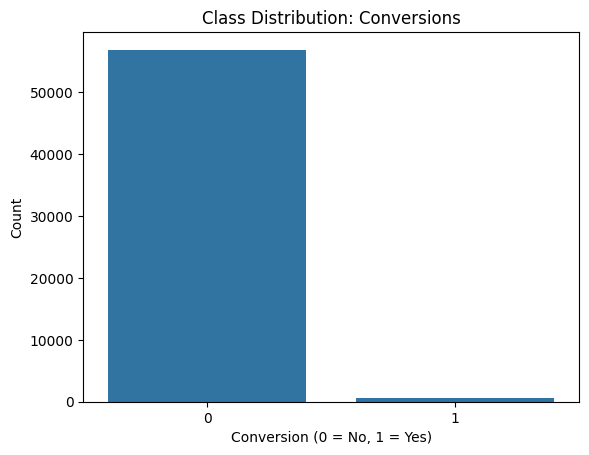

[LightGBM] [Info] Number of positive: 19900, number of negative: 38904
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 58804, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.479364 -> initscore=-0.082591
[LightGBM] [Info] Start training from score -0.082591
Adjusted Optimal Threshold: 0.1

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.69      0.81     17059
           1       0.01      0.39      0.02       173

    accuracy                           0.69     17232
   macro avg       0.50      0.54      0.42     17232
weighted avg       0.98      0.69      0.81     17232

Optimized ROC AUC Score: 0.5606


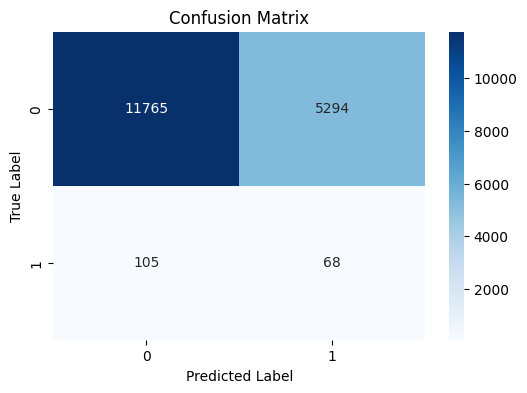

Checking for missing values:
months_since_last_purchase    0
history_spend                 0
history_footwear              0
history_apparel               0
address_category              0
acquired_in_last_year         0
channel                       0
campaign_segment              0
visit                         0
conversion                    0
spend                         0
dtype: int64

Class Distribution:
conversion
0    56860
1      578
Name: count, dtype: int64


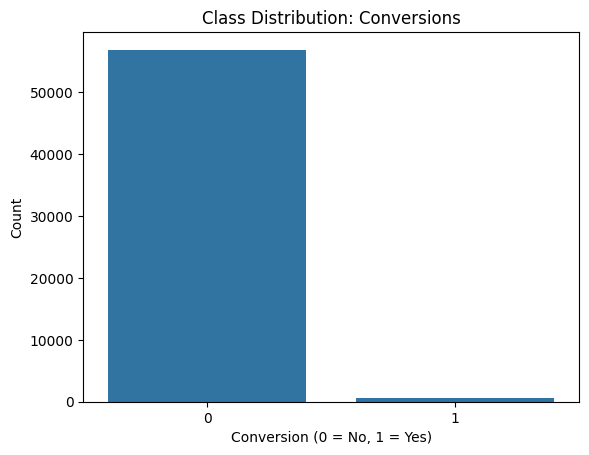

Adjusted Optimal Threshold: 0.4471790375270897

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     17059
           1       0.06      0.14      0.09       173

    accuracy                           0.97     17232
   macro avg       0.53      0.56      0.54     17232
weighted avg       0.98      0.97      0.98     17232

Optimized ROC AUC Score: 0.7395


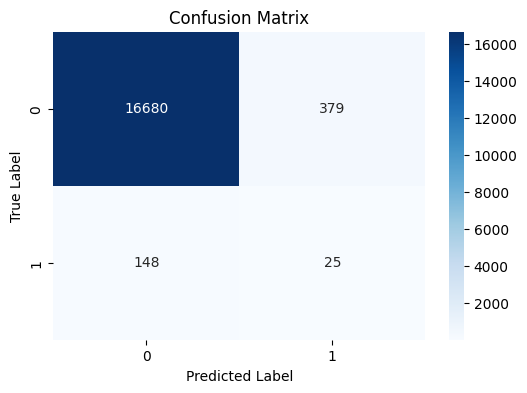

In [23]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA

# =========================== Data Cleaning and Preprocessing ===========================

# Load dataset
df = pd.read_csv('digital_marketing_dataset.csv')

# Checking for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check dataset imbalance
target_counts = df['conversion'].value_counts()
print("\nClass Distribution:")
print(target_counts)
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Class Distribution: Conversions")
plt.xlabel("Conversion (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Handle outliers in 'history_spend' using Winsorization
df['history_spend'] = winsorize(df['history_spend'], limits=[0.05, 0.05])

# Encoding categorical variables
address_dummies = pd.get_dummies(df['address_category'], prefix='address', drop_first=True)
df_encoded = pd.concat([df, address_dummies], axis=1)

label_encoder = LabelEncoder()
df_encoded['channel_encoded'] = label_encoder.fit_transform(df_encoded['channel'])
df_encoded['campaign_segment_encoded'] = label_encoder.fit_transform(df_encoded['campaign_segment'])

# Drop original categorical columns
df_encoded.drop(['address_category', 'channel', 'campaign_segment'], axis=1, inplace=True)

# =========================== Feature Engineering ===========================

# Feature scaling
scaler = StandardScaler()
numerical_features = ['months_since_last_purchase', 'history_spend']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Create new features
df_encoded['spend_per_visit'] = df_encoded['history_spend'] / (df_encoded['visit'] + 1)
df_encoded['recency_monetary'] = df_encoded['months_since_last_purchase'] * df_encoded['history_spend']
df_encoded['purchase_recency_category'] = pd.cut(df_encoded['months_since_last_purchase'], bins=[0, 3, 6, 12], labels=["Recent", "Moderate", "Old"], include_lowest=True)
df_encoded = pd.get_dummies(df_encoded, columns=['purchase_recency_category'])

# Feature selection
features = ['months_since_last_purchase', 'history_spend', 'spend_per_visit', 'recency_monetary', 'history_footwear', 'history_apparel', 'acquired_in_last_year', 'channel_encoded', 'campaign_segment_encoded'] + list(address_dummies.columns) + [col for col in df_encoded.columns if 'purchase_recency_category' in col]
X = df_encoded[features]
y = df_encoded['conversion']

# Reduce dimensionality with PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# =========================== Model Training and Evaluation ===========================

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Address class imbalance with SMOTE + Tomek Links
smote = SMOTE(sampling_strategy=0.5, random_state=42)
tomek = TomekLinks()

# Apply resampling in sequence
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = tomek.fit_resample(X_resampled, y_resampled)

# Train CatBoost Model (Best for Imbalanced Data)
best_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.05, loss_function='Logloss', random_state=42, verbose=0)
best_model.fit(X_resampled, y_resampled)

# Evaluate the model
predictions_proba = best_model.predict_proba(X_test)[:, 1]

# Optimal Threshold using Precision-Recall tradeoff
precision, recall, thresholds = precision_recall_curve(y_test, predictions_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
optimal_threshold = max(thresholds[np.argmax(f1_scores)] - 0.02, 0.12)
print(f"Adjusted Optimal Threshold: {optimal_threshold}")

# Re-evaluate optimized model with adjusted threshold
predictions_optimized = (predictions_proba >= optimal_threshold).astype(int)
print("\nOptimized Classification Report:")
print(classification_report(y_test, predictions_optimized))
roc_score = roc_auc_score(y_test, predictions_proba)
print(f"Optimized ROC AUC Score: {roc_score:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_optimized)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Checking for missing values:
months_since_last_purchase    0
history_spend                 0
history_footwear              0
history_apparel               0
address_category              0
acquired_in_last_year         0
channel                       0
campaign_segment              0
visit                         0
conversion                    0
spend                         0
dtype: int64

Class Distribution:
conversion
0    56860
1      578
Name: count, dtype: int64


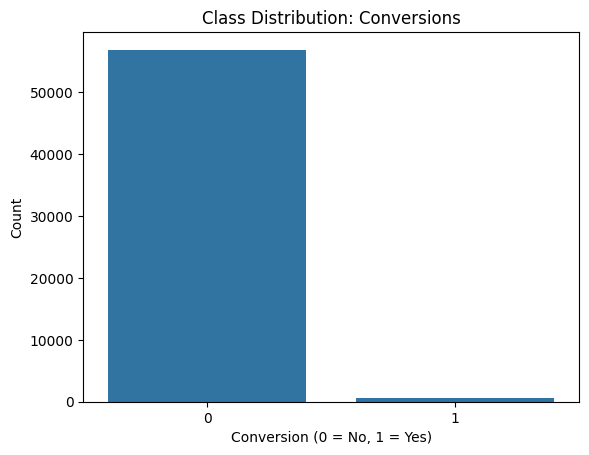

Adjusted Optimal Threshold: 0.7548488412756889

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     17059
           1       0.05      0.16      0.08       173

    accuracy                           0.96     17232
   macro avg       0.52      0.57      0.53     17232
weighted avg       0.98      0.96      0.97     17232

Optimized ROC AUC Score: 0.7350


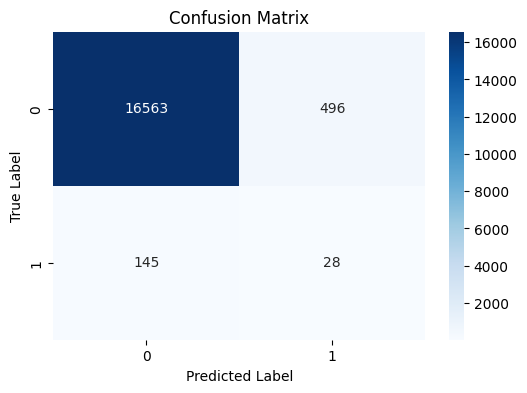

In [24]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA

# =========================== Data Cleaning and Preprocessing ===========================

# Load dataset
df = pd.read_csv('digital_marketing_dataset.csv')

# Checking for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check dataset imbalance
target_counts = df['conversion'].value_counts()
print("\nClass Distribution:")
print(target_counts)
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Class Distribution: Conversions")
plt.xlabel("Conversion (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Handle outliers in 'history_spend' using Winsorization
df['history_spend'] = winsorize(df['history_spend'], limits=[0.05, 0.05])

# Encoding categorical variables
address_dummies = pd.get_dummies(df['address_category'], prefix='address', drop_first=True)
df_encoded = pd.concat([df, address_dummies], axis=1)

label_encoder = LabelEncoder()
df_encoded['channel_encoded'] = label_encoder.fit_transform(df_encoded['channel'])
df_encoded['campaign_segment_encoded'] = label_encoder.fit_transform(df_encoded['campaign_segment'])

# Drop original categorical columns
df_encoded.drop(['address_category', 'channel', 'campaign_segment'], axis=1, inplace=True)

# =========================== Feature Engineering ===========================

# Feature scaling
scaler = StandardScaler()
numerical_features = ['months_since_last_purchase', 'history_spend']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Create new features
df_encoded['spend_per_visit'] = df_encoded['history_spend'] / (df_encoded['visit'] + 1)
df_encoded['recency_monetary'] = df_encoded['months_since_last_purchase'] * df_encoded['history_spend']
df_encoded['purchase_recency_category'] = pd.cut(df_encoded['months_since_last_purchase'], bins=[0, 3, 6, 12], labels=["Recent", "Moderate", "Old"], include_lowest=True)
df_encoded = pd.get_dummies(df_encoded, columns=['purchase_recency_category'])

# Feature selection
features = ['months_since_last_purchase', 'history_spend', 'spend_per_visit', 'recency_monetary', 'history_footwear', 'history_apparel', 'acquired_in_last_year', 'channel_encoded', 'campaign_segment_encoded'] + list(address_dummies.columns) + [col for col in df_encoded.columns if 'purchase_recency_category' in col]
X = df_encoded[features]
y = df_encoded['conversion']

# Reduce dimensionality with PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# =========================== Model Training and Evaluation ===========================

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Address class imbalance with SMOTE + Tomek Links
smote = SMOTE(sampling_strategy=0.5, random_state=42)
tomek = TomekLinks()

# Apply resampling in sequence
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = tomek.fit_resample(X_resampled, y_resampled)

# Train CatBoost Model (Best for Imbalanced Data)
best_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.05, scale_pos_weight=5, loss_function='Logloss', random_state=42, verbose=0)
best_model.fit(X_resampled, y_resampled)

# Evaluate the model
predictions_proba = best_model.predict_proba(X_test)[:, 1]

# Optimal Threshold using Precision-Recall tradeoff
precision, recall, thresholds = precision_recall_curve(y_test, predictions_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
optimal_threshold = max(thresholds[np.argmax(f1_scores)] - 0.10, 0.15)
print(f"Adjusted Optimal Threshold: {optimal_threshold}")

# Re-evaluate optimized model with adjusted threshold
predictions_optimized = (predictions_proba >= optimal_threshold).astype(int)
print("\nOptimized Classification Report:")
print(classification_report(y_test, predictions_optimized))
roc_score = roc_auc_score(y_test, predictions_proba)
print(f"Optimized ROC AUC Score: {roc_score:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_optimized)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Checking for missing values:
months_since_last_purchase    0
history_spend                 0
history_footwear              0
history_apparel               0
address_category              0
acquired_in_last_year         0
channel                       0
campaign_segment              0
visit                         0
conversion                    0
spend                         0
dtype: int64

Class Distribution:
conversion
0    56860
1      578
Name: count, dtype: int64


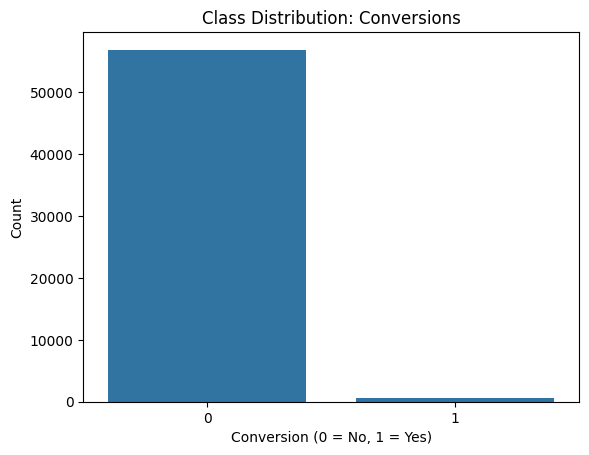

Adjusted Optimal Threshold: 0.25

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     17059
           1       0.04      0.29      0.07       173

    accuracy                           0.93     17232
   macro avg       0.52      0.61      0.52     17232
weighted avg       0.98      0.93      0.95     17232

Optimized ROC AUC Score: 0.7211


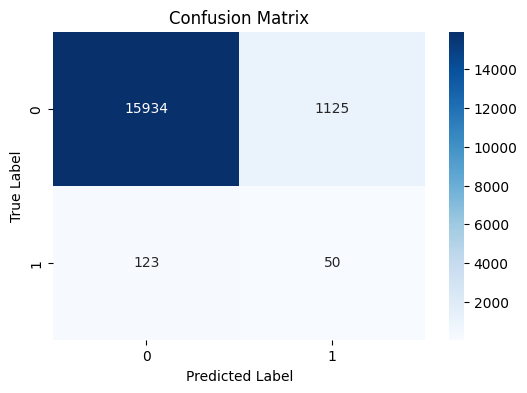

In [25]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA

# =========================== Data Cleaning and Preprocessing ===========================

# Load dataset
df = pd.read_csv('digital_marketing_dataset.csv')

# Checking for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check dataset imbalance
target_counts = df['conversion'].value_counts()
print("\nClass Distribution:")
print(target_counts)
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Class Distribution: Conversions")
plt.xlabel("Conversion (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Handle outliers in 'history_spend' using Winsorization
df['history_spend'] = winsorize(df['history_spend'], limits=[0.05, 0.05])

# Encoding categorical variables
address_dummies = pd.get_dummies(df['address_category'], prefix='address', drop_first=True)
df_encoded = pd.concat([df, address_dummies], axis=1)

label_encoder = LabelEncoder()
df_encoded['channel_encoded'] = label_encoder.fit_transform(df_encoded['channel'])
df_encoded['campaign_segment_encoded'] = label_encoder.fit_transform(df_encoded['campaign_segment'])

# Drop original categorical columns
df_encoded.drop(['address_category', 'channel', 'campaign_segment'], axis=1, inplace=True)

# =========================== Feature Engineering ===========================

# Feature scaling
scaler = StandardScaler()
numerical_features = ['months_since_last_purchase', 'history_spend']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Create new features
df_encoded['spend_per_visit'] = df_encoded['history_spend'] / (df_encoded['visit'] + 1)
df_encoded['recency_monetary'] = df_encoded['months_since_last_purchase'] * df_encoded['history_spend']
df_encoded['purchase_recency_category'] = pd.cut(df_encoded['months_since_last_purchase'], bins=[0, 3, 6, 12], labels=["Recent", "Moderate", "Old"], include_lowest=True)
df_encoded = pd.get_dummies(df_encoded, columns=['purchase_recency_category'])

# Feature selection
features = ['months_since_last_purchase', 'history_spend', 'spend_per_visit', 'recency_monetary', 'history_footwear', 'history_apparel', 'acquired_in_last_year', 'channel_encoded', 'campaign_segment_encoded'] + list(address_dummies.columns) + [col for col in df_encoded.columns if 'purchase_recency_category' in col]
X = df_encoded[features]
y = df_encoded['conversion']

# Reduce dimensionality with PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# =========================== Model Training and Evaluation ===========================

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Address class imbalance with SMOTE + Tomek Links
smote = SMOTE(sampling_strategy=0.5, random_state=42)
tomek = TomekLinks()

# Apply resampling in sequence
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = tomek.fit_resample(X_resampled, y_resampled)

# Train Stacked Model (CatBoost + RandomForest)
stacked_model = StackingClassifier(
    estimators=[
        ('cat', CatBoostClassifier(iterations=500, depth=6, learning_rate=0.05, scale_pos_weight=8, loss_function='Logloss', random_state=42, verbose=0)),
        ('rf', RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42))
    ],
    final_estimator=LogisticRegression()
)
stacked_model.fit(X_resampled, y_resampled)

# Evaluate the model
predictions_proba = stacked_model.predict_proba(X_test)[:, 1]

# Optimal Threshold using Precision-Recall tradeoff
precision, recall, thresholds = precision_recall_curve(y_test, predictions_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
optimal_threshold = max(thresholds[np.argmax(f1_scores)] - 0.30, 0.25)
print(f"Adjusted Optimal Threshold: {optimal_threshold}")

# Re-evaluate optimized model with adjusted threshold
predictions_optimized = (predictions_proba >= optimal_threshold).astype(int)
print("\nOptimized Classification Report:")
print(classification_report(y_test, predictions_optimized))
roc_score = roc_auc_score(y_test, predictions_proba)
print(f"Optimized ROC AUC Score: {roc_score:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_optimized)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()